# Convergence Analysis
This notebook visualizes Monte Carlo convergence, confidence intervals, and the payoff distribution for the prototype.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def bs_price(S0, K, r, sigma, T):
    if T <= 0:
        return max(S0 - K, 0.0)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def mc_price(S0, K, r, sigma, T, n_paths):
    if T <= 0:
        payoff = np.maximum(S0 - K, 0.0)
        return payoff, 0.0
    z = np.random.randn(n_paths)
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)
    discounted_payoffs = np.exp(-r * T) * np.maximum(ST - K, 0.0)
    price = np.mean(discounted_payoffs)
    std_error = np.std(discounted_payoffs, ddof=1) / np.sqrt(n_paths)
    return price, std_error

<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
/var/folders/4f/0g73fvd97x99r498f0q7wpzh0000gn/T/ipykernel_8097/1498381732.py:13: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Absolute error $|\hat V_n - C|$')


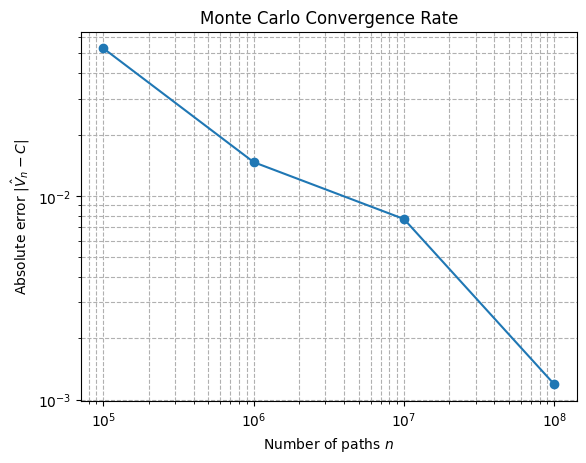

In [16]:
# Parameters
S0, K, r, sigma, T = 100.0, 100.0, 0.05, 0.2, 1.0
n_list = [10**5, 10**6, 10**7, 10**8]

# Compute errors
bs = bs_price(S0, K, r, sigma, T)
errors = [abs(mc_price(S0, K, r, sigma, T, n)[0] - bs) for n in n_list]

# Plot convergence
plt.figure()
plt.loglog(n_list, errors, marker='o')
plt.xlabel('Number of paths $n$')
plt.ylabel('Absolute error $|\hat V_n - C|$')
plt.title('Monte Carlo Convergence Rate')
plt.grid(True, which='both', ls='--')
plt.show()

<>:14: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\h'
/var/folders/4f/0g73fvd97x99r498f0q7wpzh0000gn/T/ipykernel_8097/347456174.py:14: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('MC estimate $\hat V_n$')


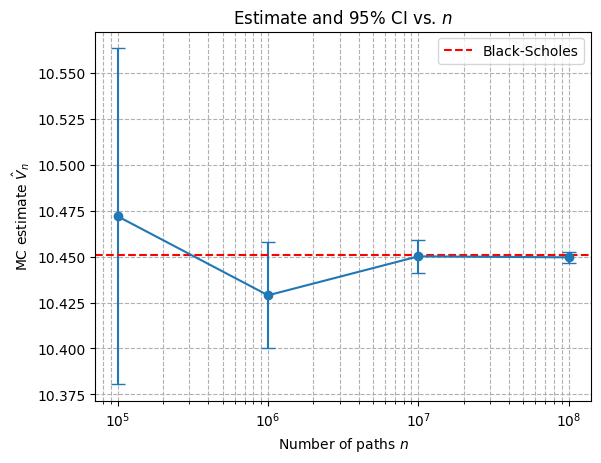

In [17]:
# Monte Carlo estimates and 95% CI vs. n
estimates = []
cis = []

for n in n_list:
    mc, se = mc_price(S0, K, r, sigma, T, n)
    estimates.append(mc)
    cis.append(1.96 * se)

plt.figure()
plt.errorbar(n_list, estimates, yerr=cis, fmt='o-', capsize=5)
plt.xscale('log')
plt.xlabel('Number of paths $n$')
plt.ylabel('MC estimate $\hat V_n$')
plt.title('Estimate and 95% CI vs. $n$')
plt.axhline(bs, color='red', linestyle='--', label='Black-Scholes')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()

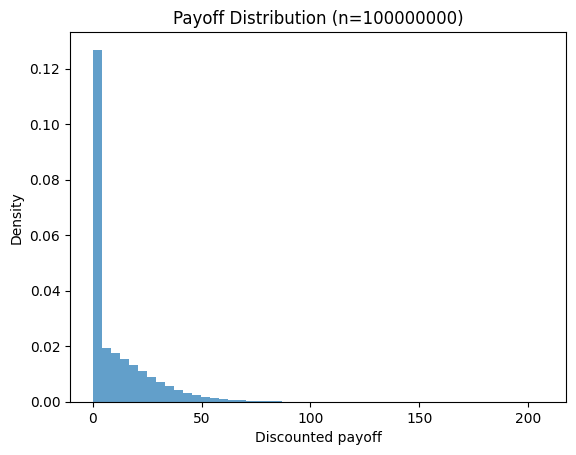

In [18]:
# Payoff distribution histogram
n_paths = 100000000
# Generate payoffs
z = np.random.randn(n_paths)
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)
discounted_payoffs = np.exp(-r * T) * np.maximum(ST - K, 0.0)

plt.figure()
plt.hist(discounted_payoffs, bins=50, density=True, alpha=0.7)
plt.xlabel('Discounted payoff')
plt.ylabel('Density')
plt.title(f'Payoff Distribution (n={n_paths})')
plt.show()